In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pypfopt import EfficientSemivariance, EfficientCVaR, EfficientCDaR, HRPOpt
from pypfopt import risk_models
from pypfopt import expected_returns
from riskfolio import RiskFunctions
from collections import OrderedDict


sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (14, 10) # não sei o motivo, mas o use acima reseta o size.

In [65]:
ANO = 2019

In [66]:
dados_acoes = pd.read_csv("dados_acoes.csv").set_index("Date")
dados_acoes = dados_acoes[f"{ANO}-01-01":"2021-07-13"].fillna(method="ffill")
dados_acoes.head()

,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BOVA11,BRML3,CIEL3,CMIG4,...,LAME4,LREN3,MGLU3,MULT3,PETR4,PRIO3,UGPA3,USIM5,VALE3,VVAR3
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,15.258595,8.481046,42.239235,22.016506,27.039375,23.512794,87.900002,12.521657,8.763200,10.641972,...,19.130808,37.888344,5.641579,24.063623,22.526630,2.0712,25.573843,9.451055,44.829338,4.38
2019-01-03,15.428659,8.850316,42.413063,22.476667,27.312134,23.770172,88.000000,12.605382,8.553904,10.418713,...,19.072599,37.409847,5.581216,24.237436,23.079029,2.0758,25.098511,9.247702,42.995453,4.31
2019-01-04,15.636516,8.529873,42.413063,21.984024,27.097815,23.537703,88.500000,12.363507,9.236394,10.314527,...,18.830070,35.974354,5.411354,23.744965,23.144567,2.0932,24.929083,9.789974,45.794544,4.27
2019-01-07,15.570379,8.484097,42.134941,22.168762,27.419289,23.188993,88.480003,12.289084,9.154496,10.009407,...,19.458136,35.147854,5.495374,23.406992,23.509716,2.0914,24.166668,9.809342,45.548859,4.24
2019-01-08,15.258595,8.508512,41.656933,22.415087,27.586721,22.848591,88.830002,12.307691,8.845098,9.957314,...,19.487350,36.278854,5.451088,23.242832,23.369276,2.1414,23.766638,9.535276,45.987583,4.04


In [67]:
dados_cripto = pd.read_csv("dados_criptos.csv").set_index("Date")
dados_cripto = dados_cripto[f"{ANO}-01-01":"2021-07-13"].fillna(method="bfill")
dados_cripto.head()

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,DCR-USD,DOGE-USD,EOS-USD,ETC-USD,ETH-USD,FIL-USD,...,NEO-USD,REP-USD,THETA-USD,TRX-USD,VET-USD,WAVES-USD,XLM-USD,XMR-USD,XRP-USD,XTZ-USD
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0.042547,164.854599,6.075273,3843.520020,17.464001,0.002392,2.663533,5.227261,140.819412,3.016652,...,7.866171,8.195203,0.049690,0.019561,0.004145,3.162524,0.115930,48.367496,0.364771,0.474699
2019-01-02,0.045258,171.827377,6.188613,3943.409424,18.415791,0.002407,2.887629,5.438700,155.047684,3.344247,...,8.076462,8.868501,0.050489,0.020222,0.004231,3.153164,0.119331,52.252449,0.375243,0.485319
2019-01-03,0.042682,162.049927,5.903535,3836.741211,18.236917,0.002360,2.681411,5.094617,149.135010,3.337603,...,7.679240,8.638993,0.052906,0.020088,0.004051,3.103900,0.113825,49.815357,0.360224,0.482134
2019-01-04,0.043812,161.395630,6.065138,3857.717529,18.562626,0.002315,2.721645,5.254148,154.581940,3.461010,...,7.634589,9.245858,0.051363,0.021492,0.004094,3.086819,0.115361,50.630875,0.356747,0.483029
2019-01-05,0.044701,160.401215,6.065543,3845.194580,18.490410,0.002319,2.699468,5.136273,155.638596,3.208686,...,7.844755,9.298466,0.050197,0.022294,0.004074,3.073536,0.114046,49.931812,0.355275,0.483224


In [68]:
dados = dados_acoes.join(dados_cripto)
dados.head()

,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BOVA11,BRML3,CIEL3,CMIG4,...,NEO-USD,REP-USD,THETA-USD,TRX-USD,VET-USD,WAVES-USD,XLM-USD,XMR-USD,XRP-USD,XTZ-USD
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,15.258595,8.481046,42.239235,22.016506,27.039375,23.512794,87.900002,12.521657,8.763200,10.641972,...,8.076462,8.868501,0.050489,0.020222,0.004231,3.153164,0.119331,52.252449,0.375243,0.485319
2019-01-03,15.428659,8.850316,42.413063,22.476667,27.312134,23.770172,88.000000,12.605382,8.553904,10.418713,...,7.679240,8.638993,0.052906,0.020088,0.004051,3.103900,0.113825,49.815357,0.360224,0.482134
2019-01-04,15.636516,8.529873,42.413063,21.984024,27.097815,23.537703,88.500000,12.363507,9.236394,10.314527,...,7.634589,9.245858,0.051363,0.021492,0.004094,3.086819,0.115361,50.630875,0.356747,0.483029
2019-01-07,15.570379,8.484097,42.134941,22.168762,27.419289,23.188993,88.480003,12.289084,9.154496,10.009407,...,8.471042,9.395186,0.051540,0.023601,0.004176,2.951987,0.123220,52.826897,0.364347,0.481431
2019-01-08,15.258595,8.508512,41.656933,22.415087,27.586721,22.848591,88.830002,12.307691,8.845098,9.957314,...,9.175762,10.048374,0.050526,0.026336,0.004382,2.887409,0.123119,53.155445,0.365315,0.484993


In [69]:
def gera_portfolio(dados_precos, tipo_dado, tipo='semivariancia', mostra_performance=False):
  in_sample, out_sample = dados_precos[:"2021-01-01"], dados_precos["2021-01-01":]

  mu = expected_returns.mean_historical_return(in_sample)
  historical_returns = expected_returns.returns_from_prices(in_sample)

  if tipo == 'semivariancia':
    es = EfficientSemivariance(mu, historical_returns)
    raw_weights = es.min_semivariance()
  elif tipo =='cvar':
    es = EfficientCVaR(mu, historical_returns)
    raw_weights = es.min_cvar()
  elif tipo == 'cdar':
    es = EfficientCDaR(mu, historical_returns)
    raw_weights = es.min_cdar()
  elif tipo =='hrp':
    es = HRPOpt(historical_returns)
    es.optimize()
    raw_weights = es.clean_weights()
  else:
    raise ValueError("Tipo de portfólio não encotrado!")

  formatted_weights = np.asarray([weight for weight in raw_weights.values()])
  if mostra_performance:
    print(f"{tipo.capitalize()} - {tipo_dado} - Expected performance:")
    es.portfolio_performance(verbose=True)
    print()
  return raw_weights, formatted_weights, out_sample

In [70]:
def portfolio_metrics(price_data, tipo='semivariancia', rf=0.0575, frequency=252):
  mu = expected_returns.mean_historical_return(price_data.to_frame()).iloc[0]
  returns = price_data.pct_change().dropna()
  actual_return = (price_data.iloc[-1]-price_data.iloc[0])/price_data.iloc[0]
  
  print(f"Actual return: {actual_return:.2%}")
  print(f"Expected annual return: {mu:.2%}")

  if tipo == 'semivariancia':
    drops = np.fmin(returns, 0)
    semivariance = np.sum(np.square(drops)) / returns.shape[0] * frequency
    semi_deviation = np.sqrt(semivariance)
    sortino_ratio = (mu - rf) / semi_deviation

    print("Annual semi-deviation: {:.1f}%".format(100 * semi_deviation))
    print("Sortino Ratio: {:.2f}".format(sortino_ratio))

  elif tipo == 'cvar':
    alpha = 0.95
    var = np.percentile(returns, 100 * (1-alpha))
    cvar_val = np.mean(returns[returns < var])

    print("Conditional Value at Risk: {:.2f}%".format(100 * cvar_val))
  
  elif tipo == 'cdar':
    cdar_val = RiskFunctions.CDaR_Rel(returns)
    print("Conditional Drawdown at Risk: {:.2f}%".format(100 * cdar_val))

  elif tipo == 'hrp':
    sd_p = math.sqrt(risk_models.sample_cov(price_data.to_frame()).iloc[0][0])
    
    print(f"Annual volatility: {sd_p:.2%}")
    print(f"Sharpe ratio: {(mu-rf)/sd_p:.2f}")
    
  else:
    raise ValueError("Tipo de portfólio não encotrado!")

In [71]:
def backtest(tipo_port: str, tipo_dado: str):
  if tipo_dado == 'crypto':
    data = dados
  elif tipo_dado == 'no_crypto':
    data = dados_acoes
  else:
    raise ValueError("Tipo de dado não encontrado!")

  C = 10_000
  raw_weights, portfolio_weights, out_sample = gera_portfolio(data, tipo_dado, tipo_port, True)
  backtest_range = out_sample.index
  out_sample_returns = out_sample.pct_change().dropna()

  if "BTC-USD" in out_sample_returns.columns and len(portfolio_weights) != 25:
    stock_proportion = 1 - portfolio_weights[-25:].sum()
    equal_stocks = np.repeat(stock_proportion/len(dados_acoes.columns), len(dados_acoes.columns))
    equal_crypto = np.repeat((1 - stock_proportion)/len(dados_cripto.columns), len(dados_cripto.columns))
    equal_weights = np.concatenate((equal_stocks, equal_crypto))
  else:
    equal_weights = np.ones_like(out_sample.columns) / len(out_sample.columns)

  capital = [(C, C)]

  for _, row in out_sample_returns.iterrows():
    portofolio_return, equal_return = np.dot(portfolio_weights, row), np.dot(equal_weights, row)

    C_portfolio, C_equal = capital[-1][0] * (1+portofolio_return), capital[-1][1] * (1+equal_return)
    capital.append((C_portfolio, C_equal))
  

  backtest_df = pd.DataFrame(capital, index=backtest_range, columns=["Portfolio", "Equally Weighted"])

  print("Backtest performance:")
  portfolio_metrics(backtest_df['Portfolio'], tipo_port)
  print()

  backtest_df.plot()
  plt.title(f"Portfolio Value Over Time - {tipo_port.capitalize()} - {tipo_dado}")
  plt.tight_layout()
  plt.savefig(f"graficos2/port_value_{tipo_port}_{tipo_dado}.png")

  return raw_weights

Semivariancia - crypto - Expected performance:
Expected annual return: 36.3%
Annual semi-deviation: 19.1%
Sortino Ratio: 1.80

Backtest performance:
Actual return: 10.16%
Expected annual return: 20.80%
Annual semi-deviation: 12.1%
Sortino Ratio: 1.24

Semivariancia - no_crypto - Expected performance:
Expected annual return: 20.0%
Annual semi-deviation: 19.7%
Sortino Ratio: 0.91

Backtest performance:
Actual return: -4.97%
Expected annual return: -9.48%
Annual semi-deviation: 12.0%
Sortino Ratio: -1.27

Cvar - crypto - Expected performance:
Expected annual return: 50.4%
Conditional Value at Risk: 3.75%

Backtest performance:
Actual return: 13.84%
Expected annual return: 28.81%
Conditional Value at Risk: -2.45%

Cvar - no_crypto - Expected performance:
Expected annual return: 19.0%
Conditional Value at Risk: 4.01%

Backtest performance:
Actual return: -5.46%
Expected annual return: -10.39%
Conditional Value at Risk: -2.36%

Cdar - crypto - Expected performance:
Expected annual return: 14

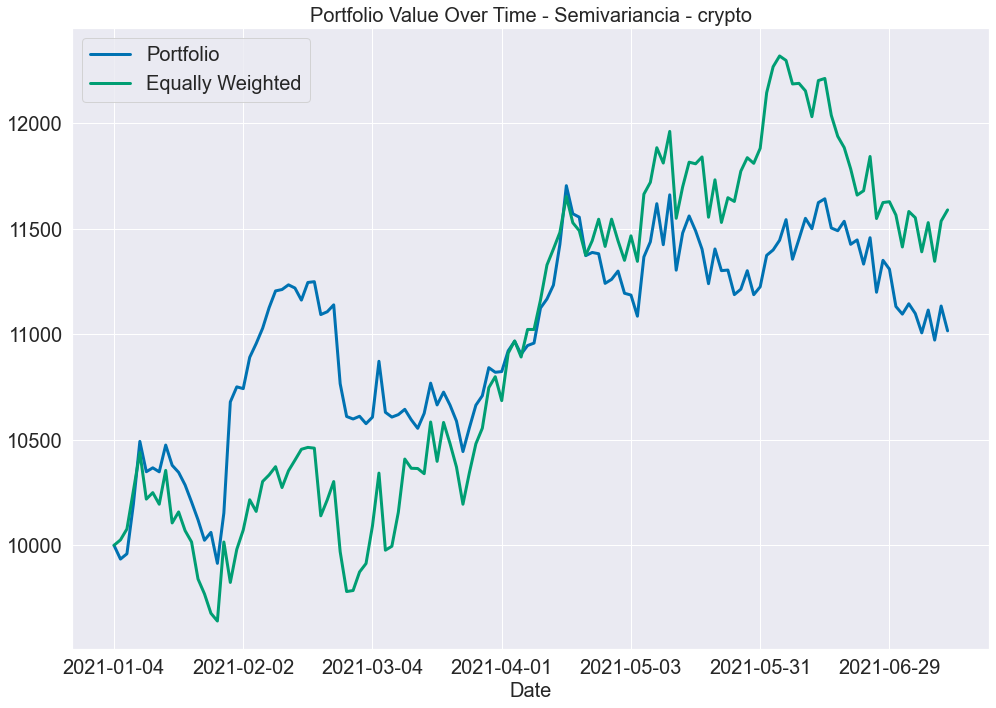

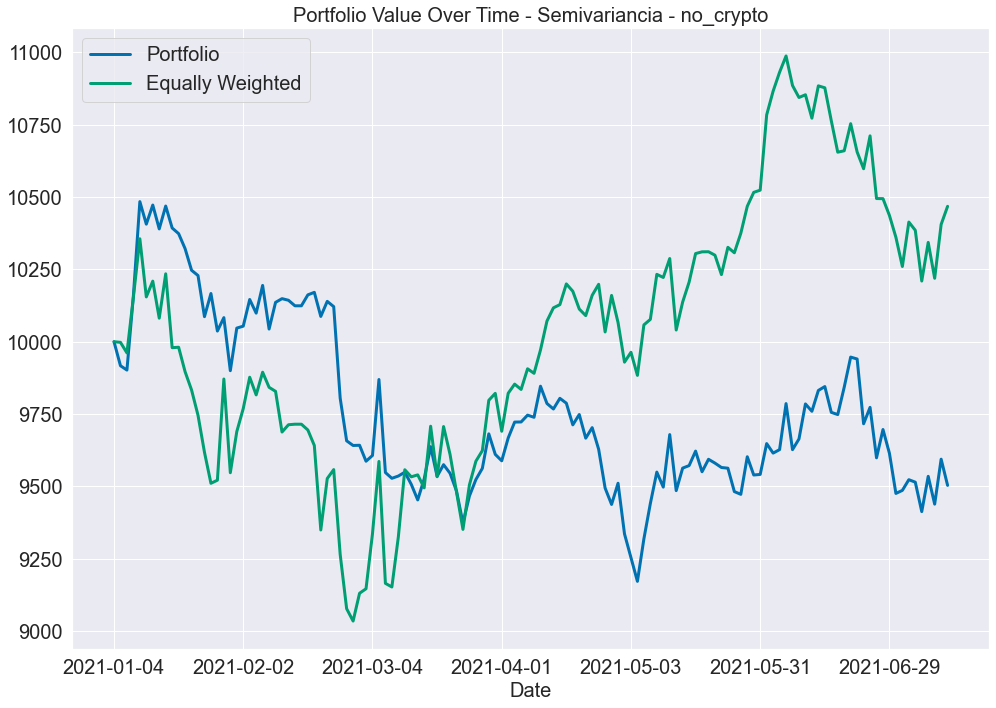

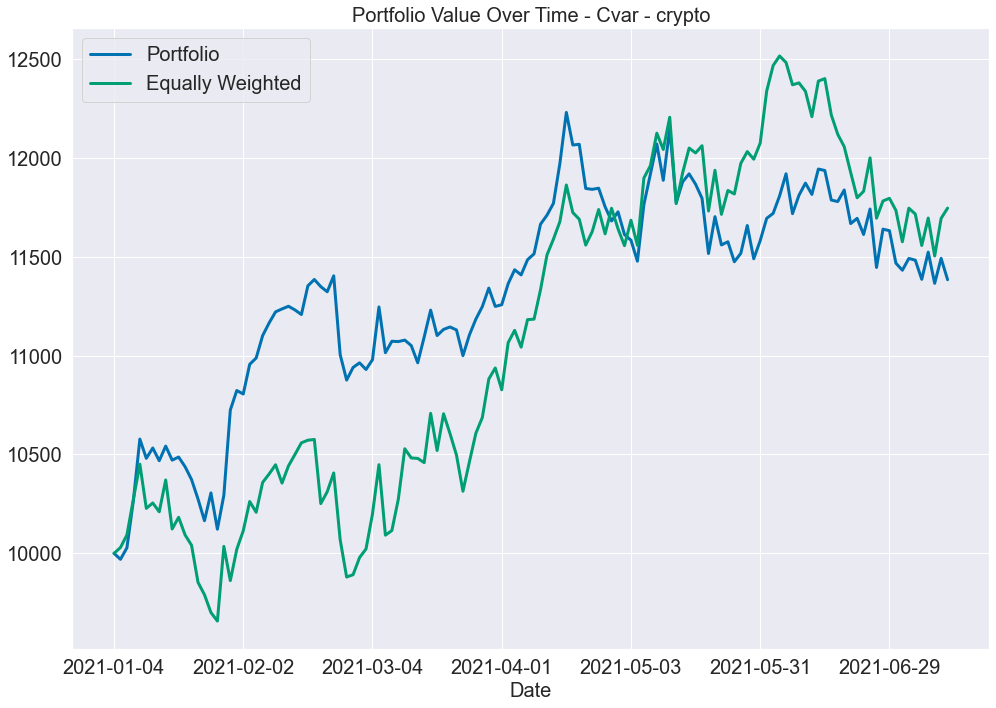

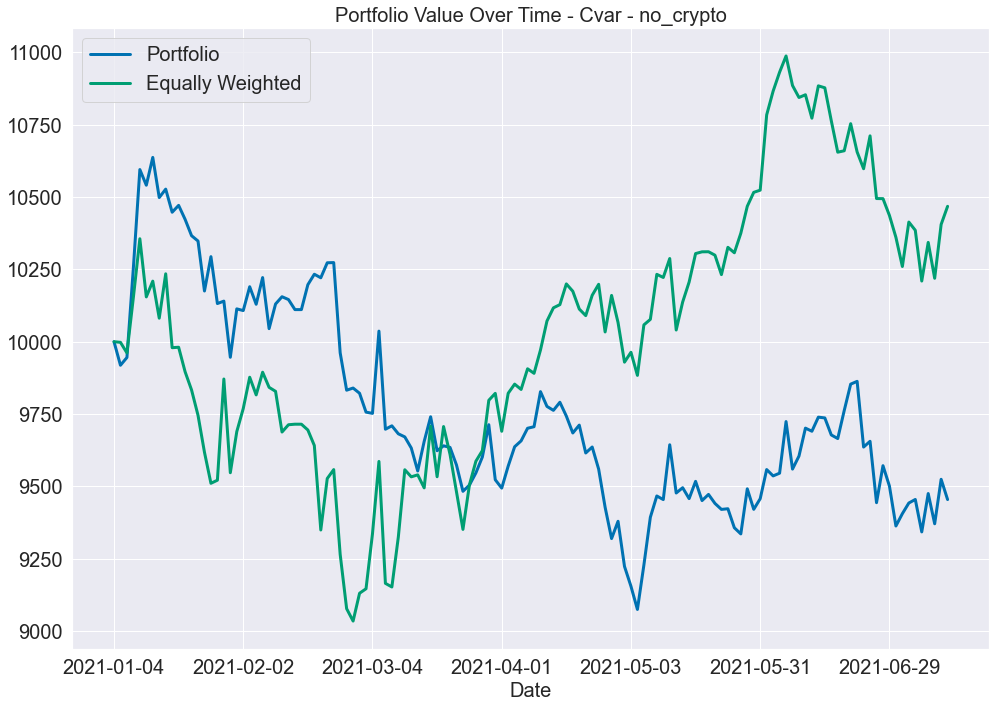

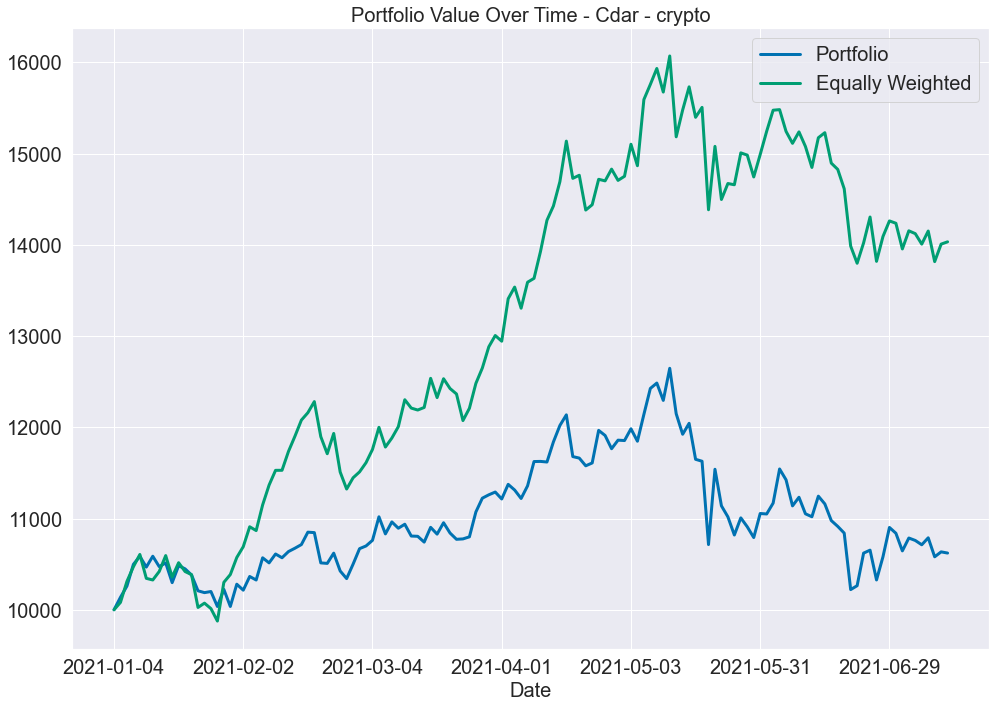

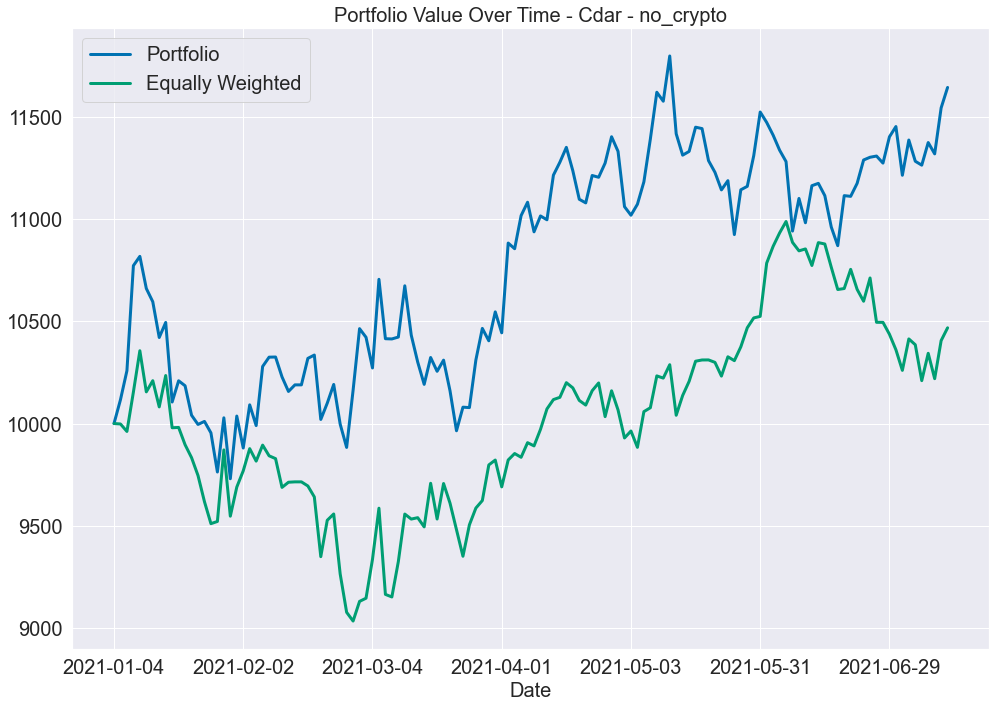

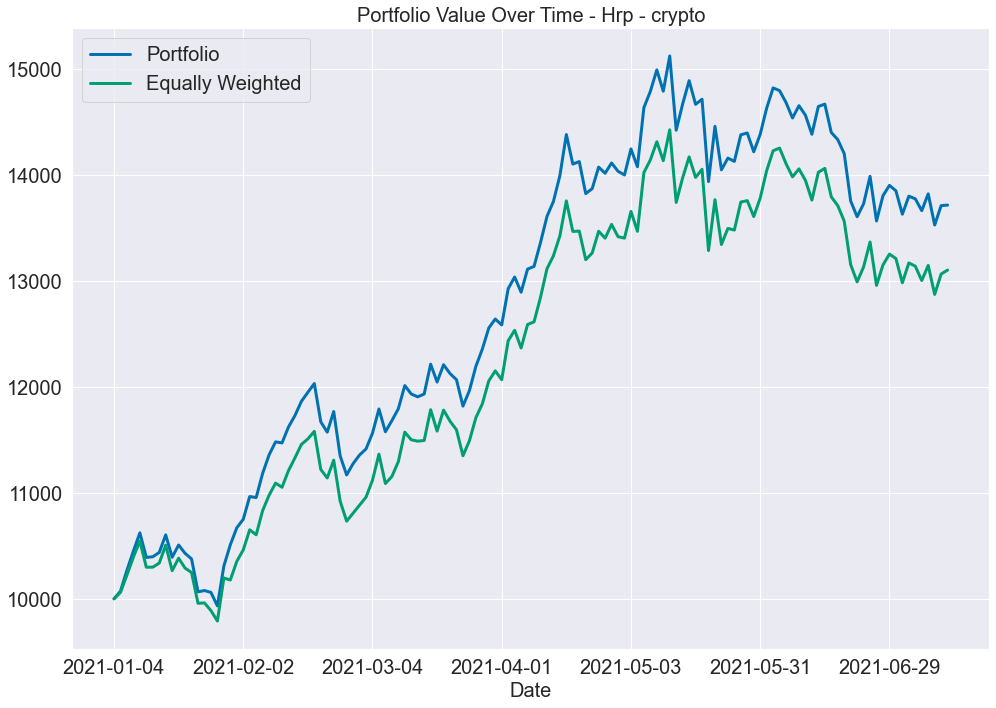

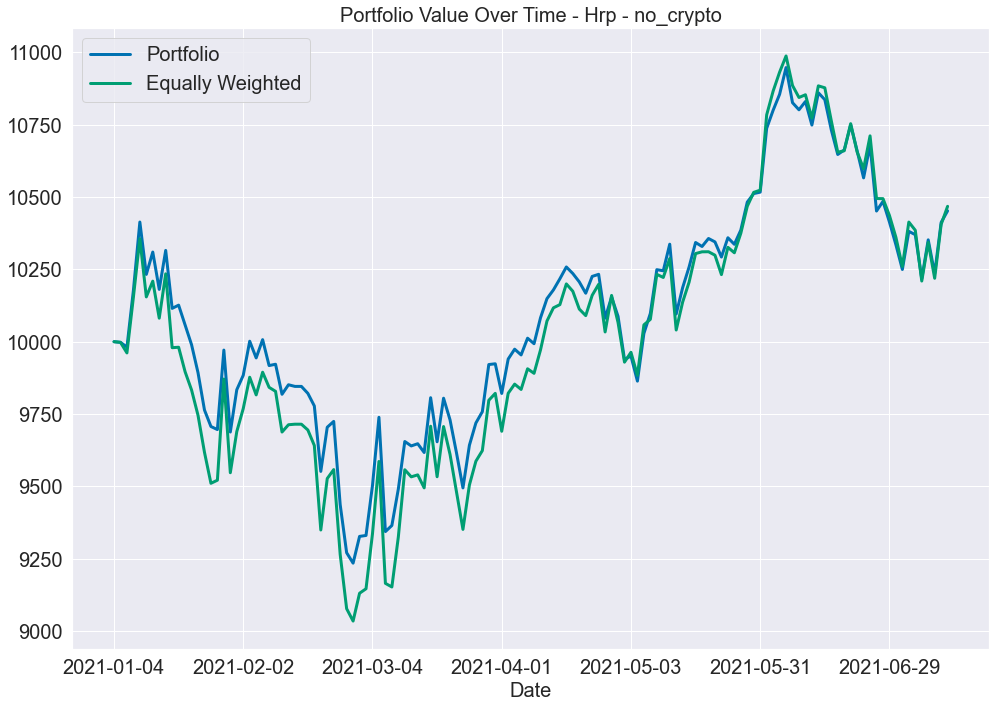

In [72]:
tipos_port = ['semivariancia', 'cvar', 'cdar', 'hrp']
tipos_dados = ['crypto', 'no_crypto']
pesos = []

for tipo_port in tipos_port:
    for tipo_dados in tipos_dados:
        peso = backtest(tipo_port, tipo_dados)
        pesos.append({"tipo_port": tipo_port, "tipo_dado": tipo_dados, "pesos": peso})

In [73]:
print(len(pesos))

8


In [74]:
def print_weights(raw_weights, tipo_port, tipo_dado):
    new_weights = OrderedDict()
    for ticker in raw_weights:
        if raw_weights[ticker] > 0.01:
            new_weights[ticker] = raw_weights[ticker]

    pd.Series(new_weights).plot.barh()
    plt.title(f"Portfolio Composition - {tipo_port.capitalize()} - {tipo_dado}")
    plt.xlabel("Proportion")
    plt.tight_layout()
    plt.savefig(f"graficos2/port_composition_{tipo_port}_{tipo_dado}.png")

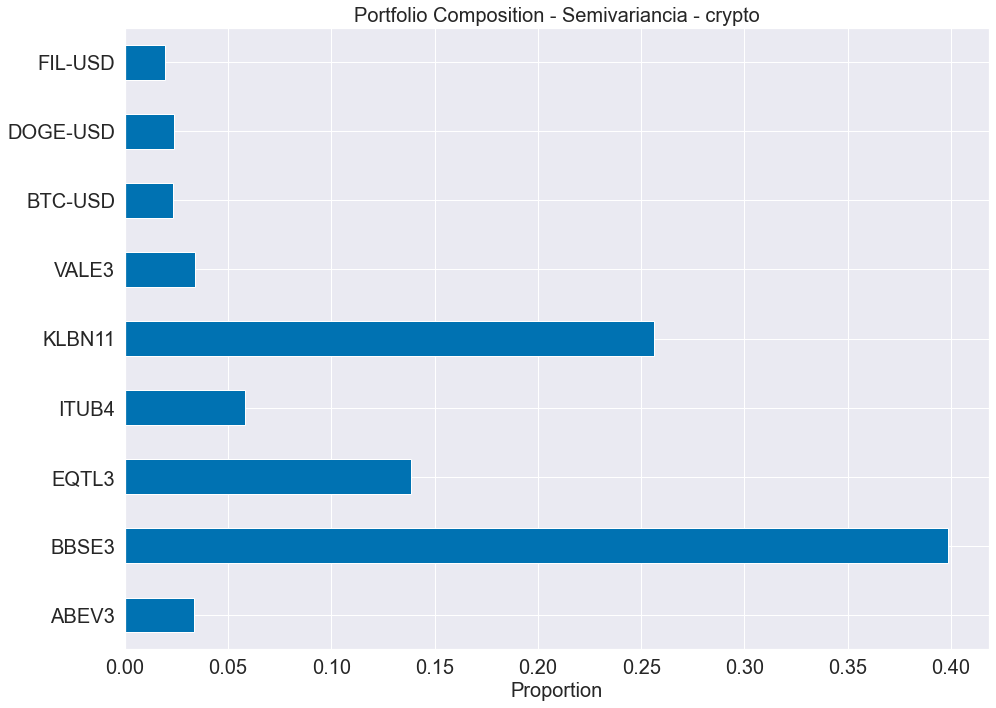

In [75]:
print_weights(pesos[0]['pesos'], pesos[0]['tipo_port'], pesos[0]['tipo_dado'])

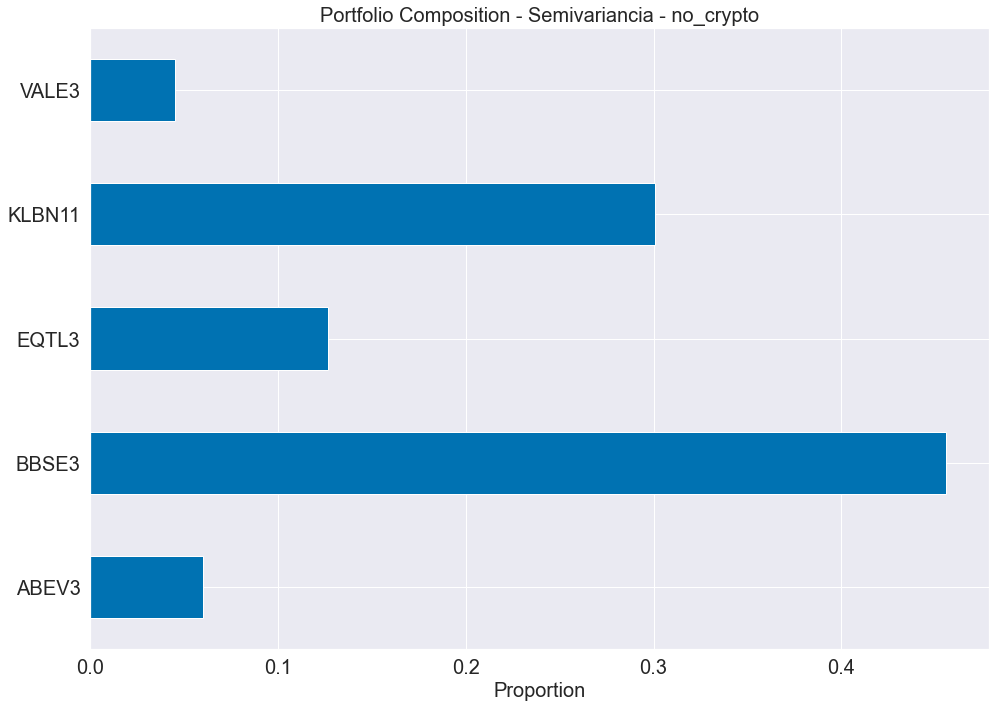

In [76]:
print_weights(pesos[1]['pesos'], pesos[1]['tipo_port'], pesos[1]['tipo_dado'])

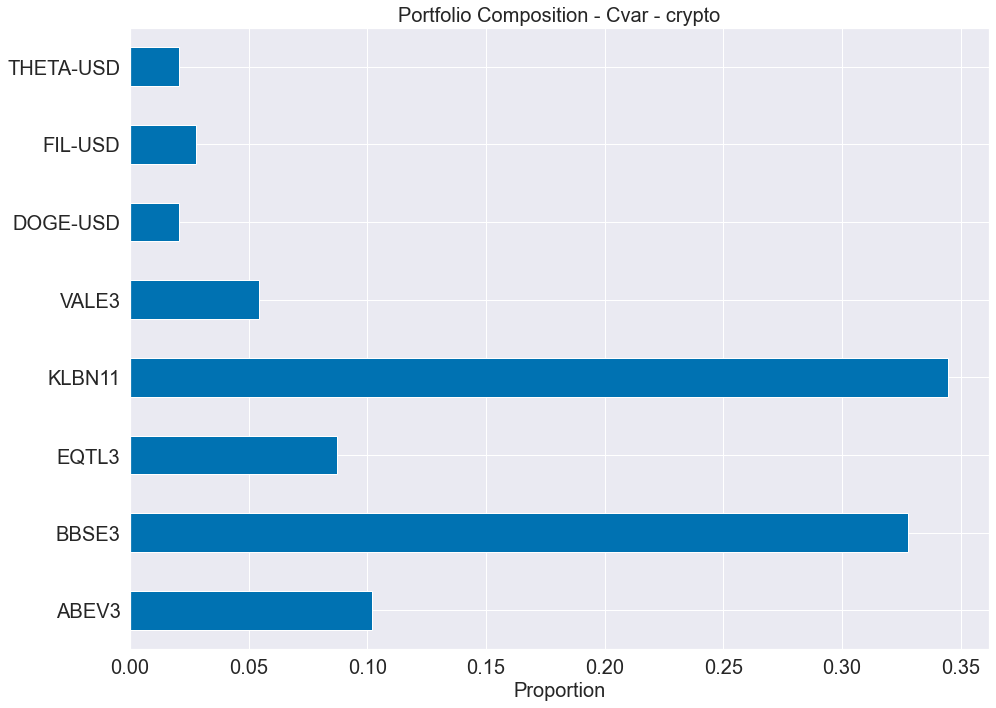

In [77]:
print_weights(pesos[2]['pesos'], pesos[2]['tipo_port'], pesos[2]['tipo_dado'])

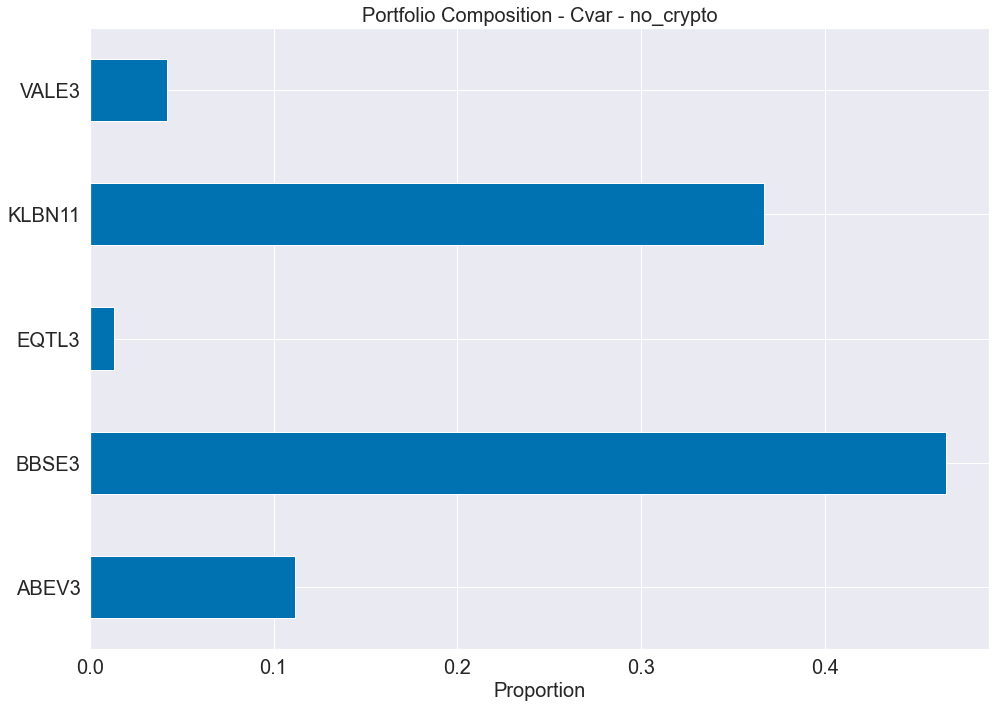

In [78]:
print_weights(pesos[3]['pesos'], pesos[3]['tipo_port'], pesos[3]['tipo_dado'])

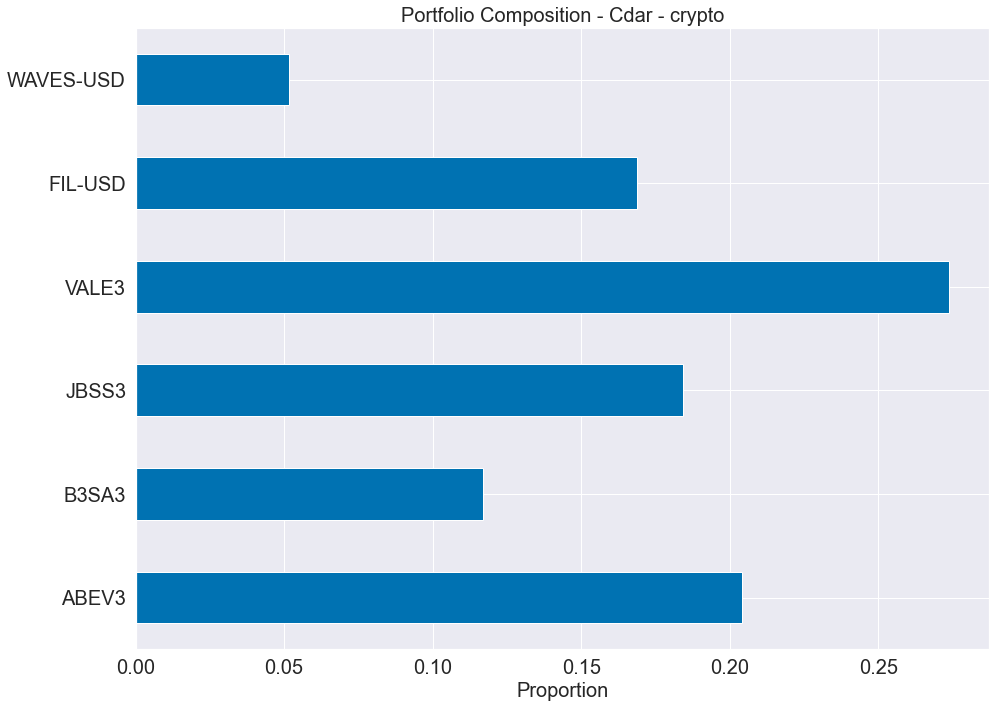

In [79]:
print_weights(pesos[4]['pesos'], pesos[4]['tipo_port'], pesos[4]['tipo_dado'])

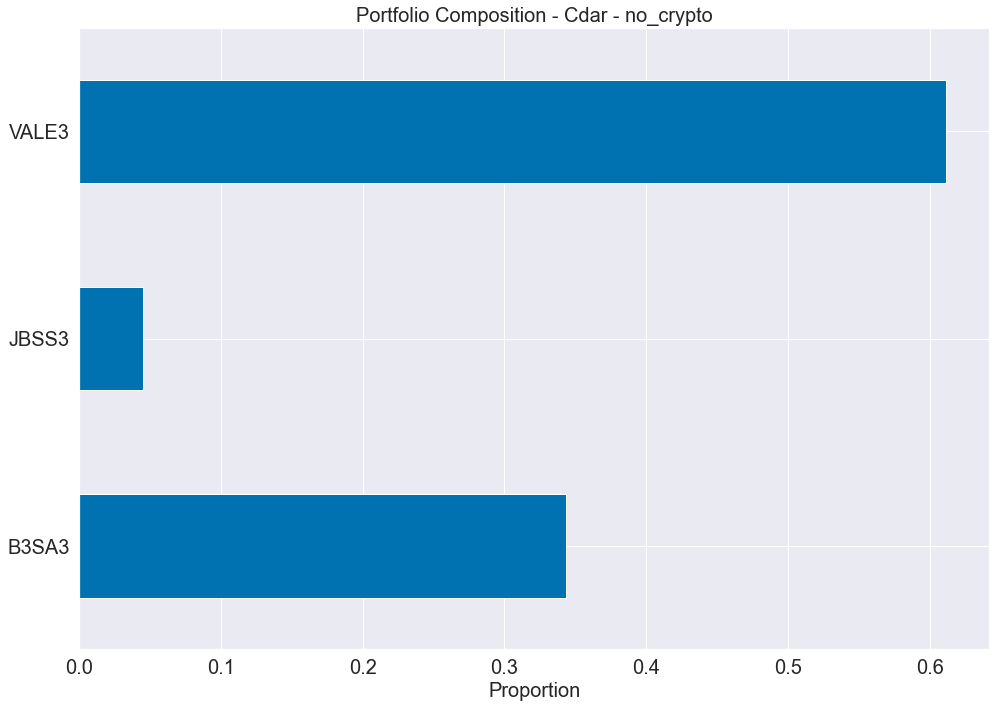

In [80]:
print_weights(pesos[5]['pesos'], pesos[5]['tipo_port'], pesos[5]['tipo_dado'])

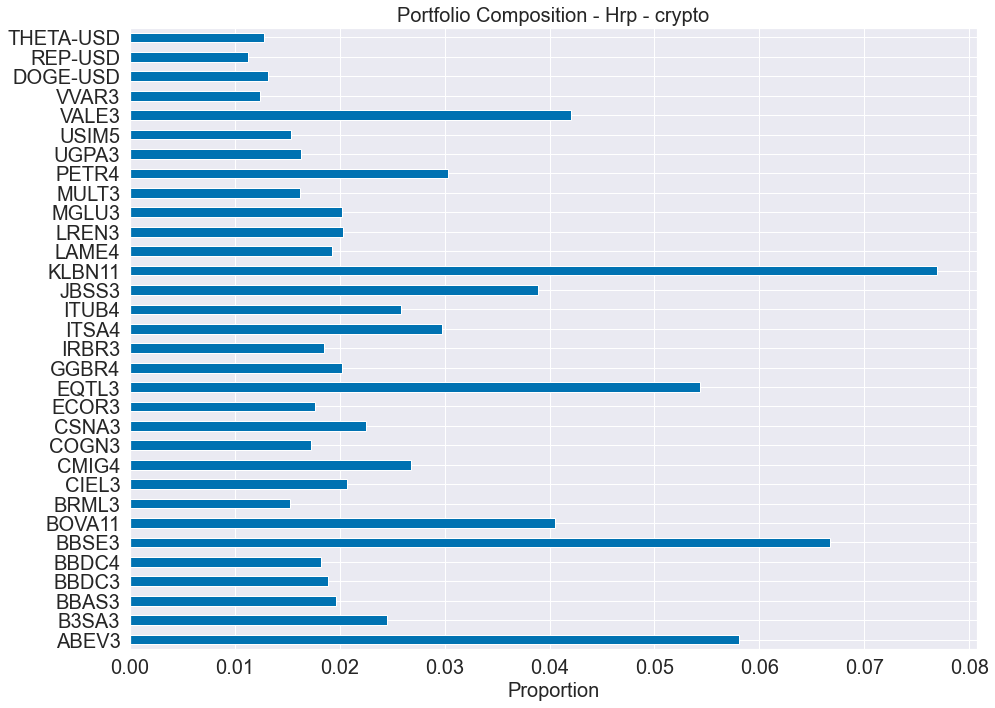

In [81]:
print_weights(pesos[6]['pesos'], pesos[6]['tipo_port'], pesos[6]['tipo_dado'])

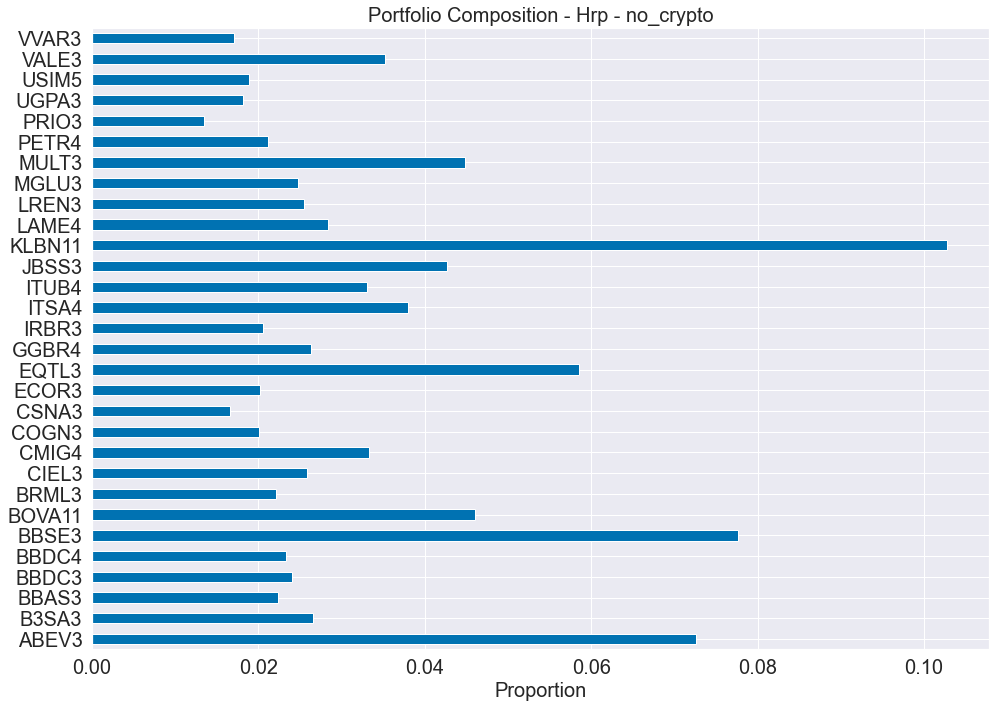

In [82]:
print_weights(pesos[7]['pesos'], pesos[7]['tipo_port'], pesos[7]['tipo_dado'])

In [83]:
def compare_portfolios(tipo_port: str):
  C = 10_000

  _, portfolio_com_cripto, out_sample_cripto = gera_portfolio(dados, "crypto", tipo_port)

  _, portfolio_sem_cripto, out_sample_sem_cripto = gera_portfolio(dados_acoes, "no_crypto", tipo_port)

  backtest_range = out_sample_cripto.index

  out_sample_cripto_returns = out_sample_cripto.pct_change().dropna()
  out_sample_sem_cripto_returns = out_sample_sem_cripto.pct_change().dropna()

  capital = [(C, C)]

  for date in out_sample_cripto_returns.index:
    cripto_row, no_cripto_row = out_sample_cripto_returns.loc[date], out_sample_sem_cripto_returns.loc[date]

    cripto_return, no_cripto_return = np.dot(portfolio_com_cripto, cripto_row), np.dot(portfolio_sem_cripto, no_cripto_row)

    C_cripto, C_no_cripto = capital[-1][0] * (1+cripto_return), capital[-1][1] * (1+no_cripto_return)
    capital.append((C_cripto, C_no_cripto))

  backtest_df = pd.DataFrame(capital, index=backtest_range, columns=["Crypto", "No-Crypto"])

  print(f"Backtest performance - {tipo_port} - Crypto:")
  portfolio_metrics(backtest_df['Crypto'], tipo_port)
  print()
  print(f"Backtest performance - {tipo_port} - No Crypto:")
  portfolio_metrics(backtest_df['No-Crypto'], tipo_port)
  print()


  backtest_df.plot()
  plt.title(f"Portfolio Comparison - {tipo_port.capitalize()}")
  plt.tight_layout()
  plt.savefig(f"graficos2/port_comp_{tipo_port}.png")

Backtest performance - semivariancia - Crypto:
Actual return: 9.62%
Expected annual return: 19.65%
Annual semi-deviation: 12.1%
Sortino Ratio: 1.15

Backtest performance - semivariancia - No Crypto:
Actual return: -4.97%
Expected annual return: -9.48%
Annual semi-deviation: 12.0%
Sortino Ratio: -1.27

Backtest performance - cvar - Crypto:
Actual return: 13.84%
Expected annual return: 28.81%
Conditional Value at Risk: -2.45%

Backtest performance - cvar - No Crypto:
Actual return: -5.46%
Expected annual return: -10.39%
Conditional Value at Risk: -2.36%

Backtest performance - cdar - Crypto:
Actual return: 6.22%
Expected annual return: 12.51%
Conditional Drawdown at Risk: 17.40%

Backtest performance - cdar - No Crypto:
Actual return: 16.43%
Expected annual return: 34.61%
Conditional Drawdown at Risk: 8.76%

Backtest performance - hrp - Crypto:
Actual return: 37.13%
Expected annual return: 85.30%
Annual volatility: 26.12%
Sharpe ratio: 3.05

Backtest performance - hrp - No Crypto:
Actual

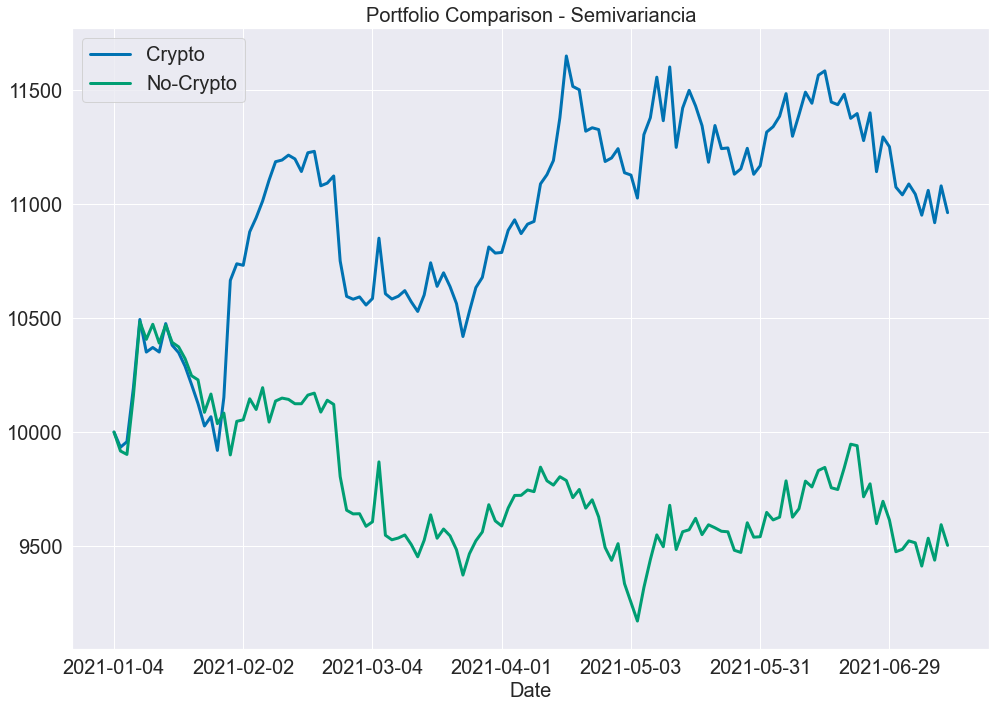

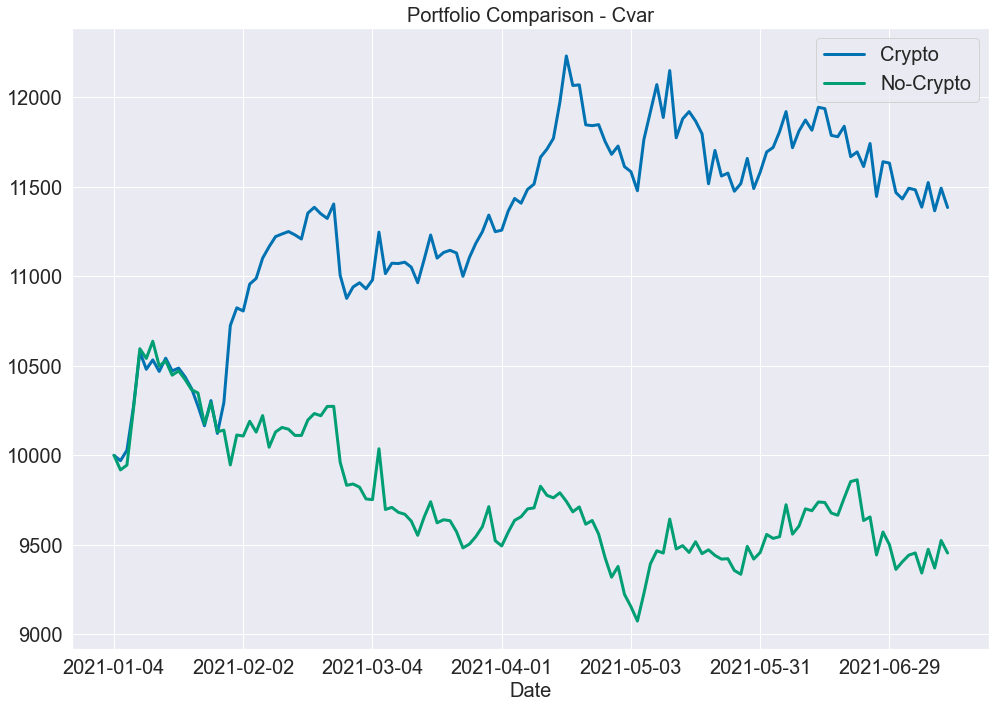

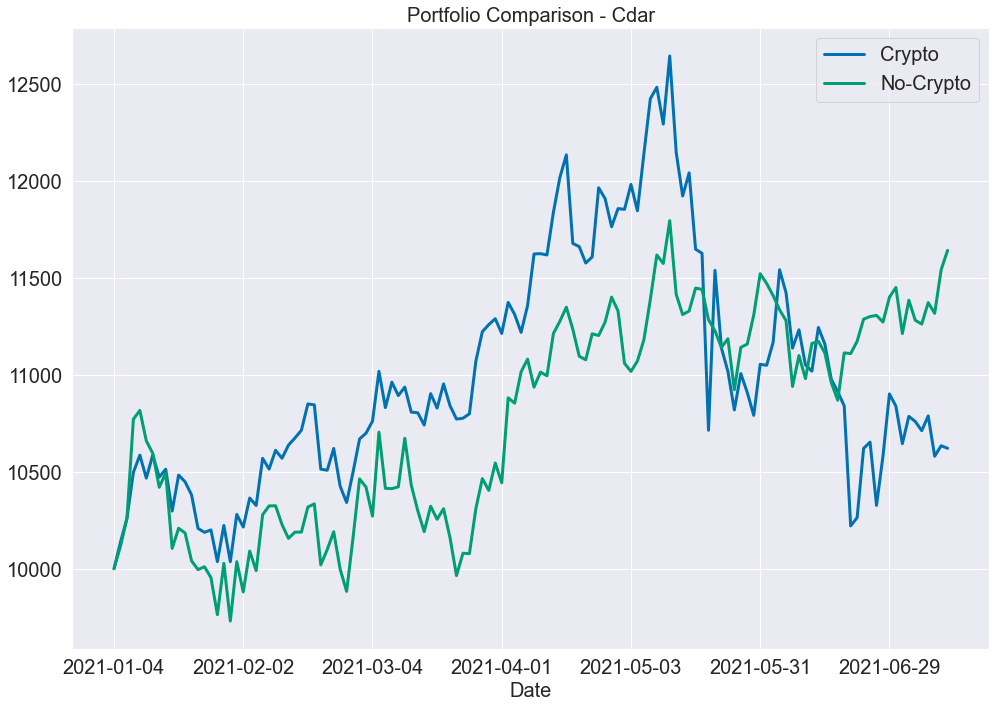

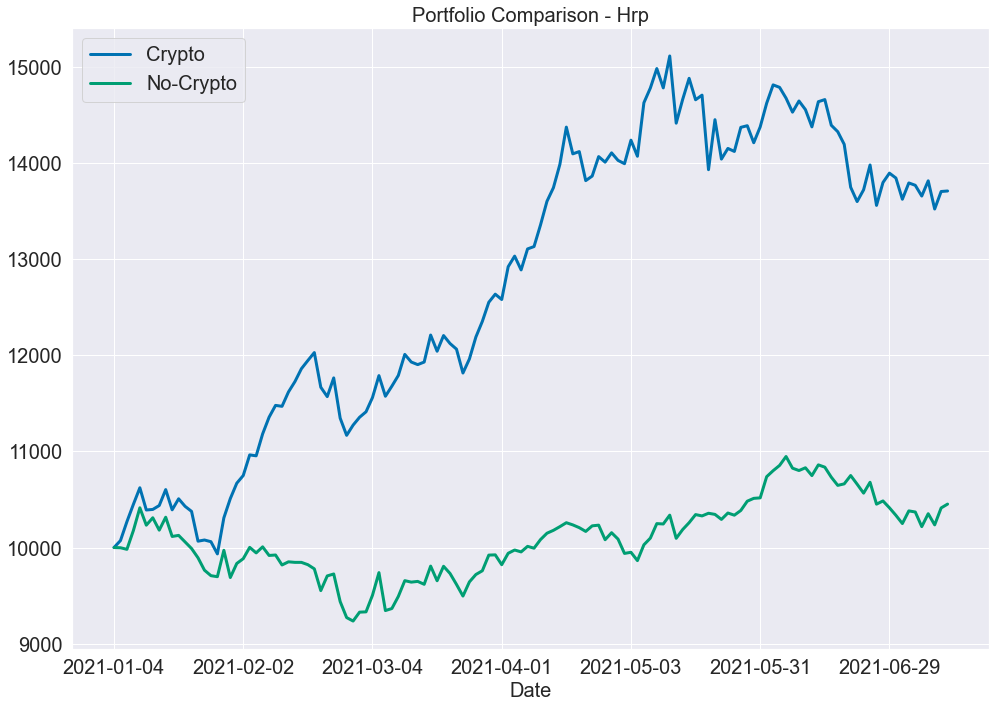

In [84]:
for tipo_port in tipos_port:
    compare_portfolios(tipo_port)